# PROBLEM STATEMENT 

### To gain insights and understand the factors that influenced the survival of passengers on the Titanic

# DATA DESCRIPTION - TITANIC

The dataset contains information about the passengers aboard the Titanic, including whether they survived or not. The dataset consists of the following columns:

1)PassengerId: A unique identifier for each passenger.

2)Survived: Indicates whether the passenger survived or not. It is represented by the values 0 (did not survive) and 1          (survived).

3)Pclass: The passenger class, which represents the socio-economic status of the passenger. It can take values 1, 2, or 3, where 1 represents the upper class, 2 represents the middle class, and 3 represents the lower class.

4)Name: The name of the passenger.

5)Sex: The gender of the passenger, either male or female.

6)Age: The age of the passenger. It can be represented as a decimal for infants or estimated for passengers whose age is unknown and denoted as xx.5.

7)SibSp: The number of siblings/spouses aboard the Titanic for a particular passenger.

8)Parch: The number of parents/children aboard the Titanic for a particular passenger.

9)Ticket: The ticket number.

10)Fare: The fare or price paid for the ticket.

11)Cabin: The cabin number where the passenger stayed.

12)Embarked: The port of embarkation for the passenger.C (Cherbourg), Q (Queenstown), or S (Southampton).



In [2]:
# importing necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [3]:
import warnings
warnings.filterwarnings("ignore")


In [4]:
df=pd.read_csv('Titanic_decisiontree.csv')

In [5]:
# check number of rows and columns 
df.shape

(1309, 12)

In [6]:
#displaying first few rows to check the headers and entries 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# reading tail for any junk values 
df.tail()

# seems like there are some missing values 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [8]:
# check for missinmg values of each column 
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
#checking data types of each column 
df.dtypes 
# some columns have wrong data types we need to change them 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
#dropping the cabin column 
df.drop(columns='Cabin',inplace=True)

In [11]:
# check whether its dropped 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [12]:
# imputting missing values  for age and Fare by mean 
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [13]:
# imputting missing values for embarked by mode 
# find the most appeared value in embarked column
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [14]:
# S is the mode fill with it 
df['Embarked'].fillna('S',inplace=True)

In [15]:
df.isna().sum()
# all the missing values have been treated 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
# do we need to change the data type of sibsp and parch 
df['SibSp'].value_counts()
# this is describing the count of passengers who were travelling alone 
#and count of passengers who had siblings and spouses along  

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [17]:
df['Parch'].value_counts()
#This is describing the count of passengers who were travelling alone 
#and count of passengers who had children along 

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64

In [18]:
df.dtypes 


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

# Changing the data type of the following columns

In [19]:
df['Survived']=df['Survived'].astype('object')
df['Pclass']=df['Pclass'].astype('object')
df['Sex']=df['Sex'].astype('object')
df['Age']=df['Age'].astype('int64')



In [20]:
df.dtypes
# data types have been changed 

PassengerId      int64
Survived        object
Pclass          object
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   object 
 2   Pclass       1309 non-null   object 
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   int64  
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 112.6+ KB


In [22]:
# five point summary of numerical columns 
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,29.685256,0.498854,0.385027,33.295479
std,378.020061,12.899824,1.041658,0.865560,51.738879
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,29.000000,0.000000,0.000000,14.454200
75%,982.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,80.000000,8.000000,9.000000,512.329200


# Univariate Analysis

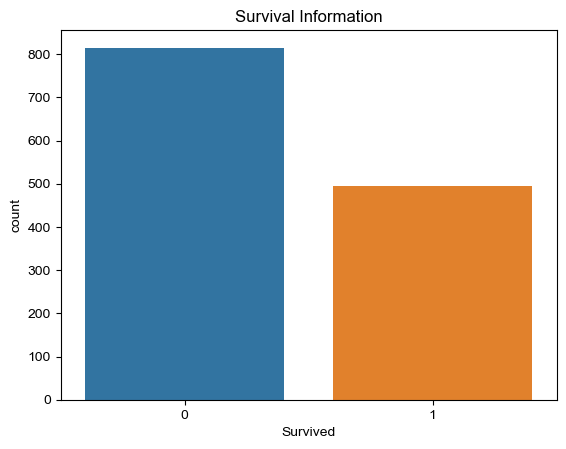

Out of 1309 passengers only 38 percent survived in the accident


In [23]:
# finding the survival rate by using count plot on survived column
sns.countplot(df['Survived'])
sns.set(style='darkgrid')
plt.title("Survival Information")
plt.show()

Survival_percent=round((df['Survived'].value_counts().values[1]/1309)*100)
print('Out of 1309 passengers only',Survival_percent,'percent survived in the accident')


3    54.163484
1    24.675325
2    21.161192
Name: Pclass, dtype: float64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

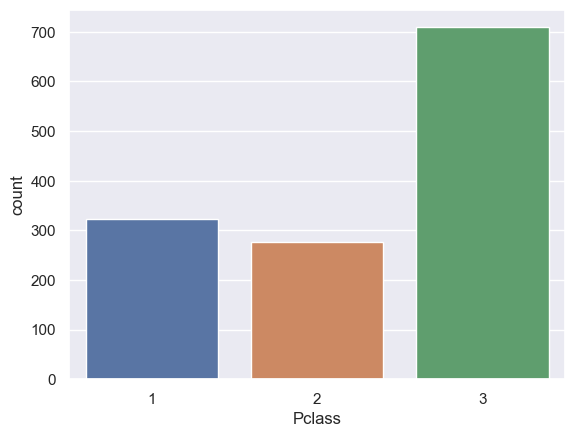

In [24]:
# Pclass column
print((df['Pclass'].value_counts()/1309)*100)
sns.countplot(df['Pclass'])

male      64.400306
female    35.599694
Name: Sex, dtype: float64


<AxesSubplot:xlabel='Sex', ylabel='count'>

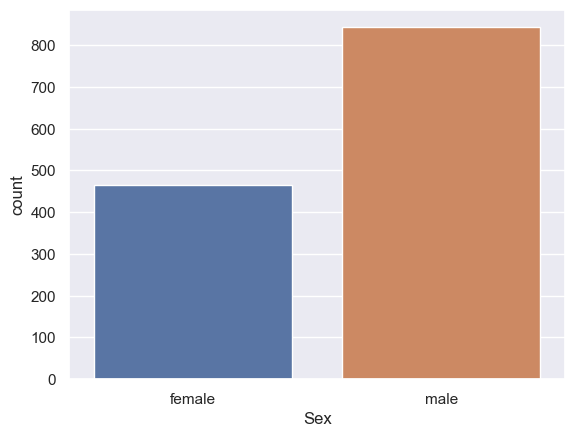

In [25]:
# Pclass column
print((df['Sex'].value_counts()/1309)*100)

df['Sex'] = pd.Categorical(df['Sex'])

# Plot countplot using Seaborn
sns.countplot(data=df, x='Sex')

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


<AxesSubplot:xlabel='SibSp', ylabel='count'>

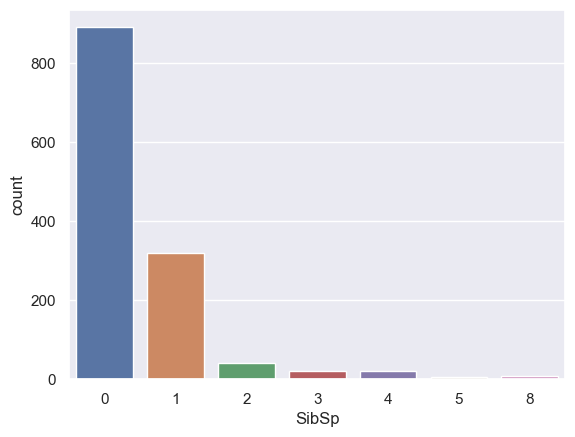

In [26]:
# Sibsp column
print(df['SibSp'].value_counts())

sns.countplot(df['SibSp'])


This is describing the count of passengers who were travelling alone 
and count of passengers who had siblings and spouses along  

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64


<AxesSubplot:xlabel='Parch', ylabel='count'>

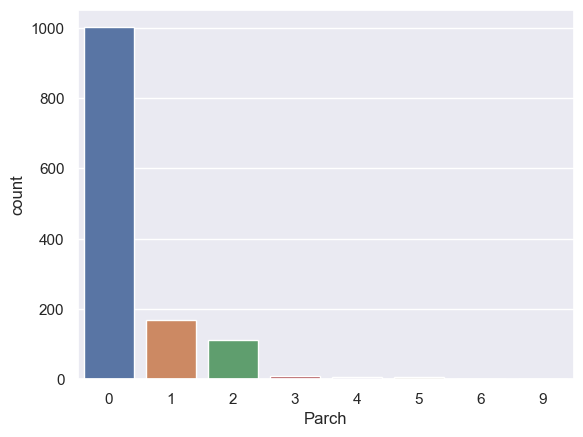

In [27]:
# Parch column
print(df['Parch'].value_counts())

sns.countplot(df['Parch'])


This is describing the count of passengers who were travelling alone 
and count of passengers who had children along 

S    69.977082
C    20.626432
Q     9.396486
Name: Embarked, dtype: float64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

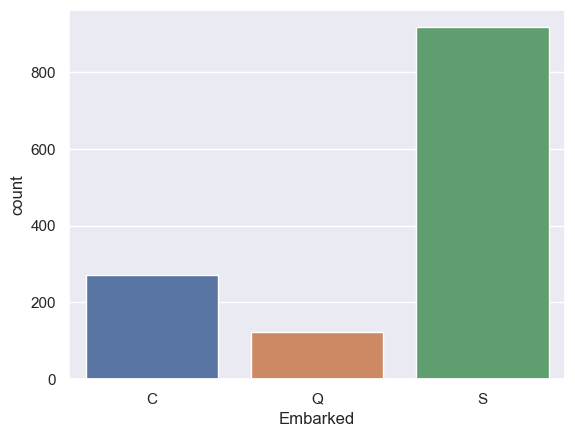

In [28]:
# Pclass column
print((df['Embarked'].value_counts()/1309)*100)

# Convert 'Embarked' column to categorical data type
df['Embarked'] = pd.Categorical(df['Embarked'])

# Plot countplot using Seaborn
sns.countplot(data=df, x='Embarked')

70% of the passengers boarded from Southampton,21% from Cherbourg and  9% from Queenstown

skewness: 0.48907094505367193
kurtosis: 0.9640691422559771


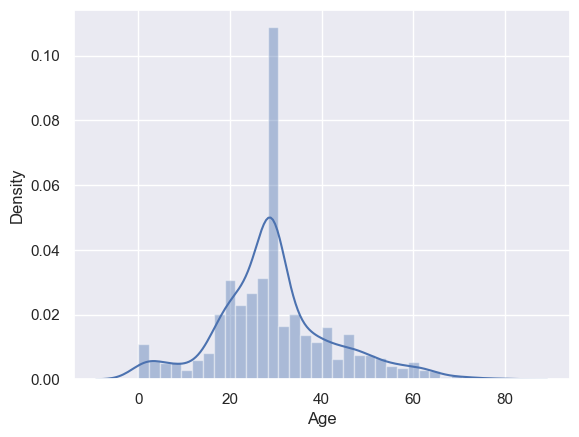

In [29]:
# Age column
sns.distplot(df["Age"])
# the distribution looks close to normal distribution
print("skewness:",df['Age'].skew())
print("kurtosis:",df['Age'].kurt())

<AxesSubplot:xlabel='Age'>

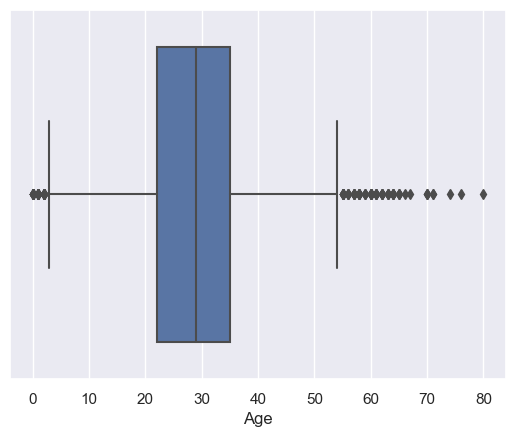

In [30]:
#check whether there are outliers 
sns.boxplot(df["Age"])

In [31]:
# there are outliers, lets check how many people are there in different age brackets 
print("people with age in between 60 and 70 are",df[(df['Age']>60) & (df["Age"]<70)].shape[0])
print("people with age greater than 70 and less than 75 are",df[(df['Age']>=70) & (df["Age"]<=75)].shape[0])
print("people with age greater than 75 are",df[df['Age']>75].shape[0])
print('_'*55)
print("people with age in between 0 and 1 are",df[df['Age']<1].shape[0])

people with age in between 60 and 70 are 24
people with age greater than 70 and less than 75 are 6
people with age greater than 75 are 2
_______________________________________________________
people with age in between 0 and 1 are 12


# Conclusion

In [32]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Fare', ylabel='Density'>

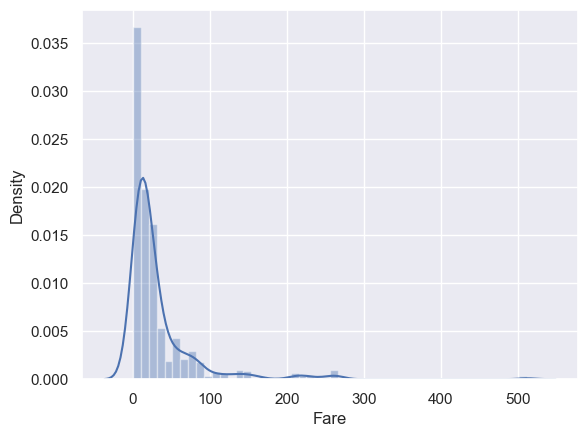

In [33]:
# fare column
sns.distplot(df['Fare'])
# Fare is right skewed 

In [34]:
print('Skewness is :',df['Fare'].skew())
print('Kurtosis is :',df['Fare'].kurt())

Skewness is : 4.369374593951007
Kurtosis is : 27.05086615808882


<AxesSubplot:xlabel='Fare'>

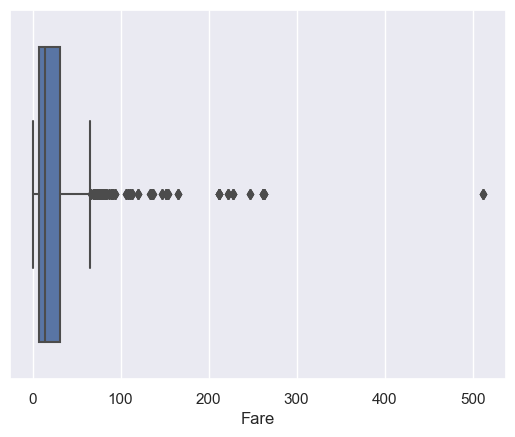

In [35]:
#lets see it through a box plot 
sns.boxplot(df['Fare'])

In [36]:
# there are outliers, lets check how many people are there in different Fare brackets 
print("people who have purchased tickets priced in between 200 and 300 are",df[(df['Fare']>=200) & (df["Fare"]<=300)].shape[0])
print("people with age greater than 70 and less than 75 are",df[df['Fare']>300].shape[0])

people who have purchased tickets priced in between 200 and 300 are 34
people with age greater than 70 and less than 75 are 4


# Multivariate Analysis

# Passenger Class

Count of people who survived and died by Pclass


Pclass,1,2,3,All
Survived,,,,
0,137,160,518,815
1,186,117,191,494
All,323,277,709,1309


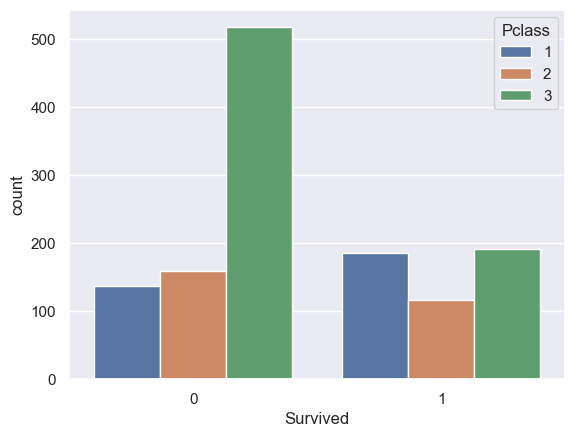

In [37]:
# survival with PClass
sns.countplot(data=df, x='Survived', hue='Pclass')
print('Count of people who survived and died by Pclass')
pd.pivot_table(df, values='PassengerId', index='Survived', columns='Pclass', aggfunc='count', margins=True)



In [38]:
# Calculate the percentage of survived people class-wise
print('percentage of survival for each Pclass')
pd.crosstab(df['Pclass'],df['Survived']).apply(lambda r: round((r/r.sum())*100,0),axis=1)





percentage of survival for each Pclass


Survived,0,1
Pclass,,
1,42.0,58.0
2,58.0,42.0
3,73.0,27.0


Survival rate is highest for Pclass 1 with 58% and lowest for Pclass 3 with 27%


# Gender

Count of people who survived and died by Gender


Sex,female,male,All
Survived,,,
0,81,734,815
1,385,109,494
All,466,843,1309


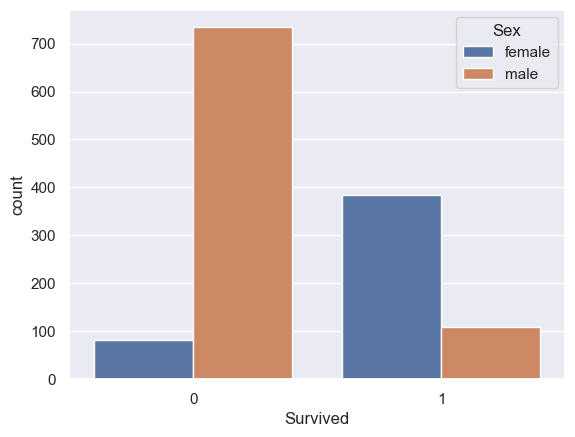

In [47]:
# survival with PClass
sns.countplot(df['Survived'],hue=df['Sex'])
print('Count of people who survived and died by Gender')
pd.pivot_table(df, values='PassengerId', index='Survived', columns='Sex', aggfunc='count', margins=True)


In [48]:
#percentage of male and female survival
cross_table = pd.crosstab(df['Sex'], df['Survived'])
overall_survival=(cross_table[1].sum()/cross_table.values.sum())*100

print('Overall survival rate of titanic was',overall_survival)

print('Percentage of male and female survived')
pd.crosstab(df['Sex'],df['Survived']).apply(lambda r: round((r/r.sum())*100,0),axis=1)



Overall survival rate of titanic was 37.73873185637891
Percentage of male and female survived


Survived,0,1
Sex,,
female,17.0,83.0
male,87.0,13.0


Overall survival rate was 38% ,survivale rate of females was 83% ,while as it was only 13% for men

# Embarked

Count of people who survived and died by city of embarkation


Embarked,C,Q,S,All
Survived,,,,
0,137,69,609,815
1,133,54,307,494
All,270,123,916,1309


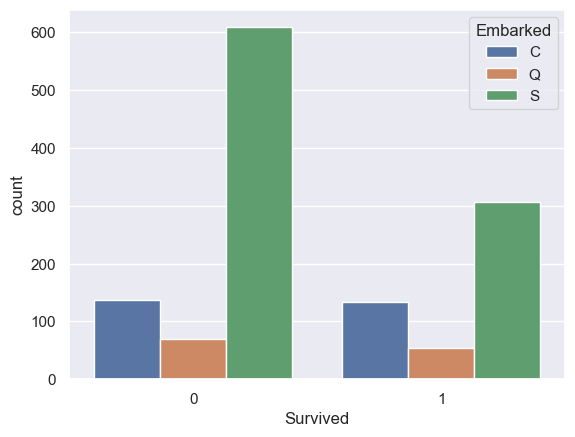

In [49]:
#survival with city of embarkation
sns.countplot(df['Survived'],hue=df['Embarked'])

print('Count of people who survived and died by city of embarkation')
pd.pivot_table(df, values='PassengerId', index='Survived', columns='Embarked', aggfunc='count', margins=True)


In [50]:
#percentage survival by city of embarkation
cross_table = pd.crosstab(df['Embarked'], df['Survived'])


print('Percentage of passengers survived by city of embarkation')
pd.crosstab(df['Embarked'],df['Survived']).apply(lambda r: round((r/r.sum())*100,0),axis=1)


Percentage of passengers survived by city of embarkation


Survived,0,1
Embarked,,
C,51.0,49.0
Q,56.0,44.0
S,66.0,34.0


Survival rate for people who boarded from Cherbourg was the highest at 49% ,and lowest for people who boarded from Southampton at 34%

# Survival with age

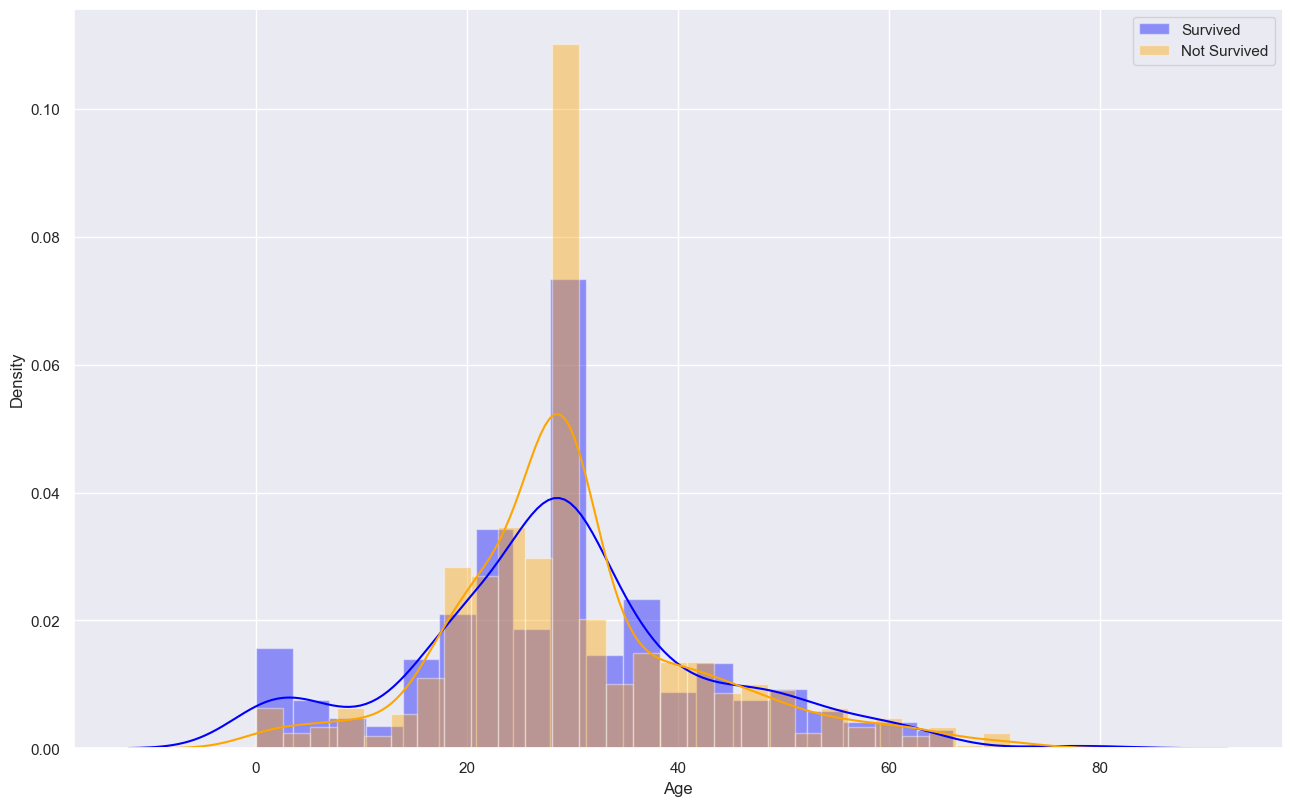

In [51]:
plt.figure(figsize=(15.6,9.6))
sns.distplot(df[df['Survived']==1]['Age'],color='blue', label='Survived')
sns.distplot(df[df['Survived']==0]['Age'],color='orange', label='Not Survived')
plt.legend()
plt.show()

Age groups which are lower than 16 have a higher chance of survival , while as the probability of not surviving is higher in the age agroup of 17 to 35 .

# Survival with Fare

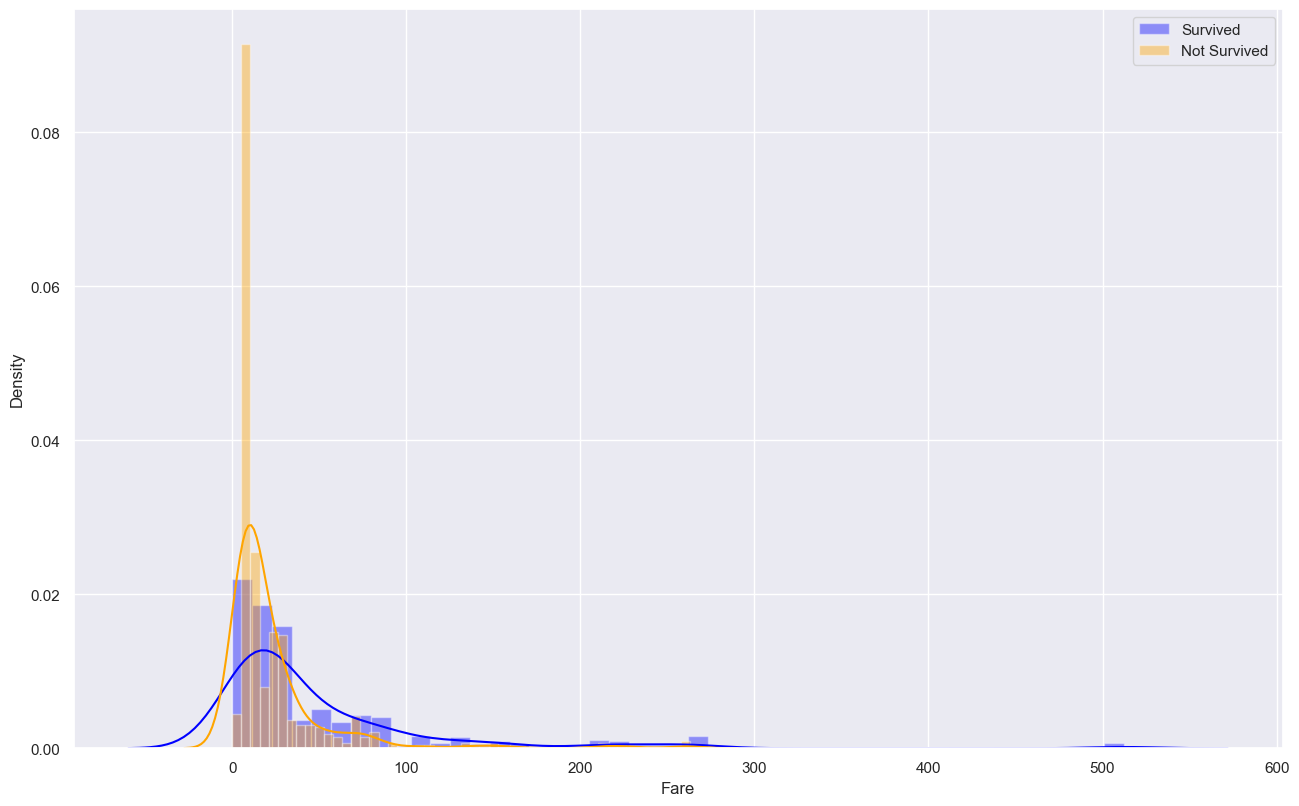

In [52]:
plt.figure(figsize=(15.6,9.6))
sns.distplot(df[df['Survived']==1]['Fare'],color='blue', label='Survived')
sns.distplot(df[df['Survived']==0]['Fare'],color='orange', label='Not Survived')
plt.legend()
plt.show()

Survival rate was  higher for passengers who had purchased high priced tickets

# Pair Plot

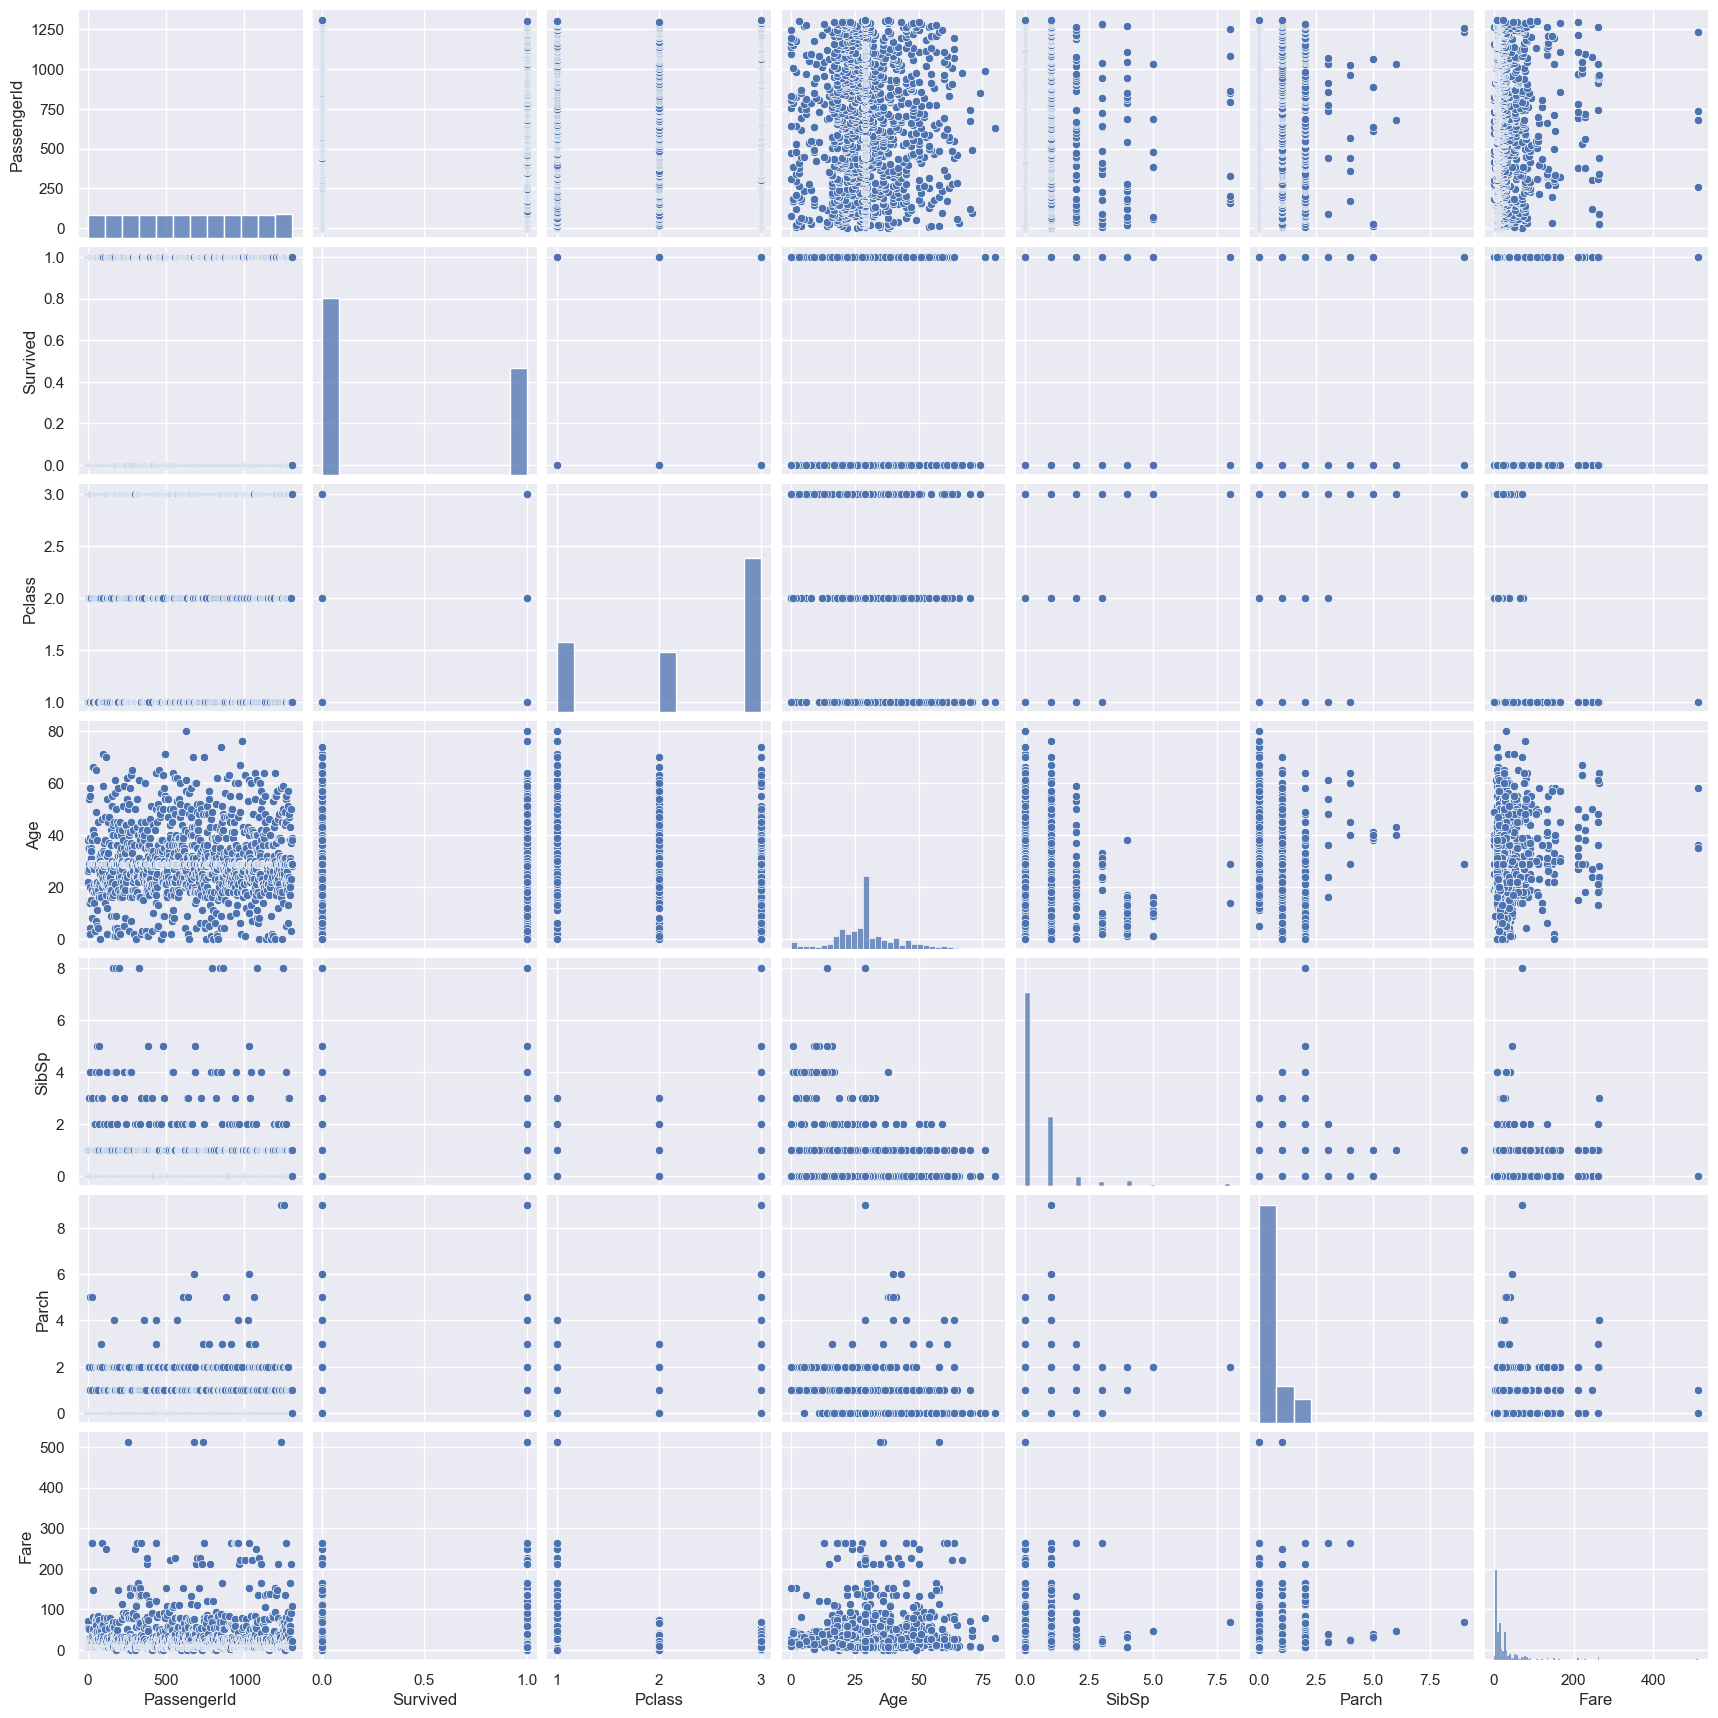

In [53]:
sns.pairplot(df)

# Heat Map of numeric columns 

<AxesSubplot:>

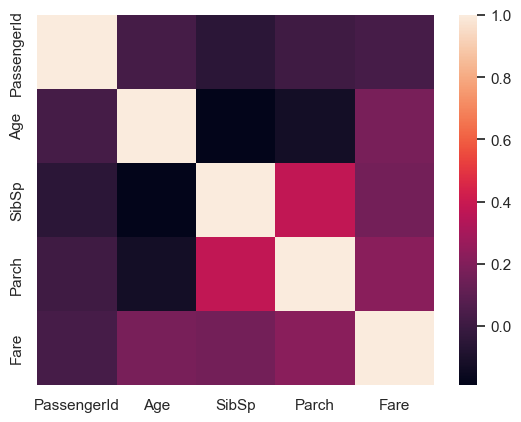

In [54]:
sns.heatmap(df.corr())

In [55]:
df.corr()

,PassengerId,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.025566,-0.055224,0.008942,0.031416
Age,0.025566,1.000000,-0.190345,-0.128821,0.175114
SibSp,-0.055224,-0.190345,1.000000,0.373587,0.160224
Parch,0.008942,-0.128821,0.373587,1.000000,0.221522
Fare,0.031416,0.175114,0.160224,0.221522,1.000000


Sibsp and Parch has a moderate correlation

# Feature Engineering 

I am creating a new column by the name family size ,which will be thw sum of sibsp and parch cols 


In [56]:
df['family_size']=df['Parch']+df['SibSp']

In [57]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
724,725,1,1,"Chambers, Mr. Norman Campbell",male,27,1,0,113806,53.1000,S,1
1015,1016,0,3,"Kennedy, Mr. John",male,29,0,0,368783,7.7500,Q,0
239,240,0,2,"Hunt, Mr. George Henry",male,33,0,0,SCO/W 1585,12.2750,S,0
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63,0,0,4134,9.5875,S,0
212,213,0,3,"Perkin, Mr. John Henry",male,22,0,0,A/5 21174,7.2500,S,0


Now we will engineer a new feature by the name of family type

In [58]:
# function to classify family type
def family_type(num):
    if num==0:
        return "Alone"
    elif num>0 and num<=4:
        return "Medium"
    else:
        return "Large"

In [59]:
df['family_type']=df['family_size'].apply(family_type)

In [60]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
1269,1270,0,1,"Hipkins, Mr. William Edward",male,55,0,0,680,50.000,S,0,Alone
1221,1222,1,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48,0,2,C.A. 33112,36.750,S,2,Medium
554,555,1,3,"Ohman, Miss. Velin",female,22,0,0,347085,7.775,S,0,Alone
1239,1240,0,2,"Giles, Mr. Ralph",male,24,0,0,248726,13.500,S,0,Alone
84,85,1,2,"Ilett, Miss. Bertha",female,17,0,0,SO/C 14885,10.500,S,0,Alone


In [61]:
# now we will drop sibsp, parch and family size , as we have captured these in family type
df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [62]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
695,696,0,2,"Chapman, Mr. Charles Henry",male,52,248731,13.5000,S,Alone
560,561,0,3,"Morrow, Mr. Thomas Rowan",male,29,372622,7.7500,Q,Alone
189,190,0,3,"Turcin, Mr. Stjepan",male,36,349247,7.8958,S,Alone
930,931,0,3,"Hee, Mr. Ling",male,29,1601,56.4958,S,Alone
631,632,0,3,"Lundahl, Mr. Johan Svensson",male,51,347743,7.0542,S,Alone


In [63]:
# survival based on family type
pd.crosstab(df['family_type'],df['Survived']).apply(lambda r:round( (r/r.sum())*100,1),axis=1)

Survived,0,1
family_type,,
Alone,70.8,29.2
Large,78.3,21.7
Medium,45.5,54.5


Survival rate of medium sized families is the highest at 55% , as compared to lone travellers and large families 

# Handling Outliers

# Numeric data

# Categorical data

In [64]:
# handling outliers in age , it is following almost normal distribution
df = df[(df['Age'] < (df["Age"].mean() + 3 * df['Age'].std())) & (df['Age'] > (df["Age"].mean() - 3 * df['Age'].std()))]
df.shape


# Calculate the mean and standard deviation of the age column
#age_mean = df['Age'].mean()
#age_std = df['Age'].std()

# Define the lower and upper thresholds for outliers
#lower_threshold = age_mean - 3 * age_std
#upper_threshold = age_mean + 3 * age_std

# Filter the DataFrame to exclude outliers on both ends of the age distribution
#df_filtered = df[(df['Age'] > lower_threshold) & (df['Age'] < upper_threshold)]


(1301, 10)

In [65]:
# handling outliers from Fare column
# finding quantiles and eliminating outliers 
Q1=np.percentile(df['Fare'],25)
Q3=np.percentile(df['Fare'],75)
outlier_lower =Q1- 1.5*(Q3-Q1)
outlier_upper =Q3 + 1.5*(Q3-Q1)

df=df[(df['Fare']>outlier_lower) & (df['Fare']<outlier_upper)]
df.shape


(1132, 10)

# One hot encoding for categorical columns

In [66]:
df=pd.get_dummies(data=df,columns=['Pclass','Sex','Embarked','family_type'],drop_first=True)
df

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,0,1,1,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,0,0,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,0,1,1,0,1,0,0
5,6,0,"Moran, Mr. James",29,330877,8.4583,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,1304,1,"Henriksson, Miss. Jenny Lovisa",28,347086,7.7750,0,1,0,0,1,0,0
1304,1305,0,"Spector, Mr. Woolf",29,A.5. 3236,8.0500,0,1,1,0,1,0,0
1306,1307,0,"Saether, Mr. Simon Sivertsen",38,SOTON/O.Q. 3101262,7.2500,0,1,1,0,1,0,0
1307,1308,0,"Ware, Mr. Frederick",29,359309,8.0500,0,1,1,0,1,0,0


<AxesSubplot:>

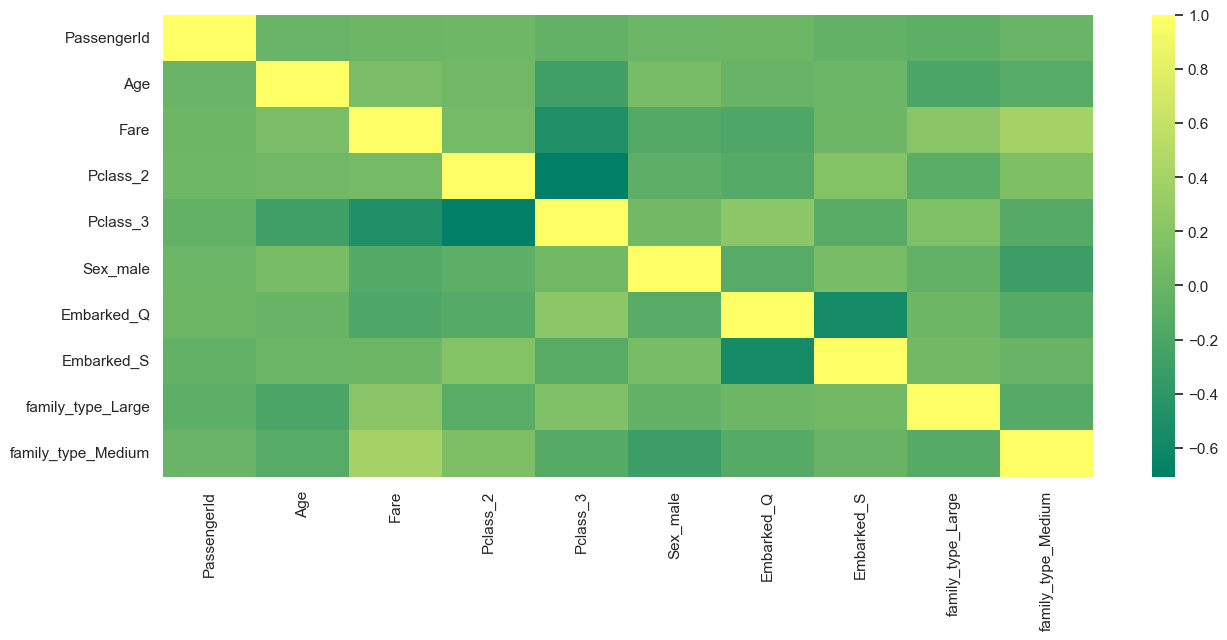

In [67]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap='summer')

# Conclusions